In [1]:
pip install diffprivlib 

     ------------------------------------ 176.0/176.0 kB 816.6 kB/s eta 0:00:00



In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
from diffprivlib.models import GaussianNB
import numpy as np

import matplotlib.pyplot as plt

In [6]:
clf.predict(X_test)

array([1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1,
       2, 0, 1, 2, 1, 2, 2, 2])

In [13]:
print("Test accuracy: %f" % clf.score(X_test, y_test))

Test accuracy: 0.866667


In [20]:
columnNames=["Status of existing checking account","Duration in month","Credit history",
         "Purpose","Credit amount","Savings account/bonds","Present employment since",
         "Installment rate in percentage of disposable income","Personal status and sex",
         "Other debtors / guarantors","Present residence since","Property","Age in years",
        "Other installment plans","Housing","Number of existing credits at this bank",
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","class"]
def loadGermanData():
    df=pd.read_csv("german.data",sep=" ",header=None)
    
    df.columns = columnNames    
    return df

In [23]:
df = loadGermanData()

In [24]:
le = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [25]:
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,class
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,...,0,31,2,1,1,1,1,0,0,1
996,0,30,2,1,3857,0,2,4,0,0,...,1,40,2,1,1,3,1,1,0,1
997,3,12,2,4,804,0,4,4,2,0,...,2,38,2,1,1,2,1,0,0,1
998,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,2,1,1,0,2


In [26]:
normalized_data = preprocessing.normalize(df, axis=1, norm='l2')
normalized_data = pd.DataFrame(normalized_data, columns=columnNames)

In [44]:
dataset = normalized_data.values
X = dataset[:, :-1]
#X = X.astype(str)
y = dataset[:,-1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
bounds = ([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])
clf = GaussianNB(bounds=bounds, epsilon=100)
clf.fit(X_train, y_train)

GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (1.0, 0), (0.01, 0), (0.012067926406393288, 0), ...]),
           bounds=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]),
                   array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])),
           epsilon=100)

In [62]:
nonprivate_clf = GaussianNB()
nonprivate_clf.fit(X_train, y_train)

C:\Users\chanc\anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (1.0, 0), (0.01, 0), (0.012067926406393288, 0), ...]),
           bounds=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]),
                   array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])))

In [61]:
clf.score(X_test, y_test)

0.69

In [64]:
clf.score(X_test, nonprivate_clf.predict(X_test)) * 100

61.5

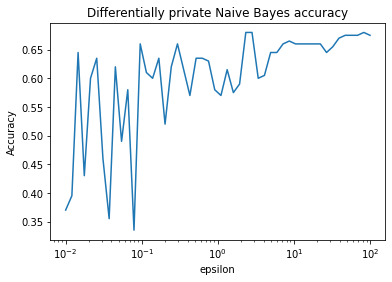

In [69]:
epsilons = np.logspace(-2, 2, 50)
bounds = ([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(bounds=bounds, epsilon=epsilon,random_state=42)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

In [12]:
import base64
import os
import numpy as np
from cryptography.fernet import Fernet
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.fernet import Fernet, MultiFernet

In [13]:
salt = os.urandom(16) # to be kept safe same code will be used to decrypt the data
salt

b'\xc9\x1f\xeb\x93\xfc\xd1\xef\xcd\xcdk\x18WJ\xde,\xd1'

In [14]:
def encryptData(data):
    password = b"password"    
    kdf = PBKDF2HMAC(
            algorithm=hashes.SHA256(),
            length=32,
            salt=salt,
            iterations=480000,)
    key = base64.urlsafe_b64encode(kdf.derive(password))
    f = Fernet(key)
    token = f.encrypt(data)
    return token

In [17]:
val = encryptData(np.bytes_(-1.254566	))

In [18]:
val

b'gAAAAABlEvwQjDhIflpmBrJXvZzac6hWeVmslbsq7vAY5MXJToJRvoYUo_jJTZU5XQkDnlFMurzdEgdUyWlmDXN08M5-2cbR0w=='

In [19]:
import struct

In [31]:
np.frombuffer(val, dtype=np.float32)

array([1.2078467e+01, 9.3935905e+26, 6.6427572e+10, 9.5136662e+05,
       4.6504655e+27, 8.9036833e+14, 2.8863778e+20, 2.5532029e+14,
       1.8803812e+31, 1.2051815e+30, 3.4034156e+15, 3.5438852e+06,
       2.1736279e+11, 1.4942047e+13, 3.8399638e+06, 7.9480128e-07,
       9.4127100e+02, 2.0806218e+08, 1.8479734e+22, 1.5695762e+13,
       4.5715131e+27, 7.5067796e-10, 1.0305805e-11, 2.4308171e+11,
       4.6256244e-02], dtype=float32)

In [32]:
np.frombuffer(val, dtype=np.int32)

array([1094795623, 1816281409, 1366783557, 1231570026, 1836084326,
       1481273922, 1635408502, 1466447459, 1936545381, 1903387244,
       1497462327, 1247300917, 1380609876, 1431924598, 1248485231,
        894786132, 1147883864, 1296460910, 1685746293, 1432643397,
       1835816825,  810440772,  758467896, 1382179634, 1027438384])

In [40]:
import syft as sy
import torch

ModuleNotFoundError: No module named 'syft'

In [36]:
struct.pack('f', sum(np.frombuffer(val, dtype=np.float32)))

b'a\xad|s'

In [ ]:
struct.unpack('f', struct.pack('f', sum(np.frombuffer(val, dtype=np.float32))))

(2.0019155126098208e+31,)